In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
%load_ext autoreload
%autoreload 2
%matplotlib ipympl
center_a_coordinate = (382, 392)
center_a2_coordinate = (385, 410)
center_d_coordinate = (255.5, 255.5)


# pixel position measure from design image
pixel_d_minus = np.array([190, 154, 128, 107, 88, 71, 55, 41, 27, 15, 5])

img_a_array = np.moveaxis(np.array(Image.open('./aperture/product/result_14_6_measure.png')), 0, 1)
img_a2_array = np.moveaxis(np.array(Image.open('./aperture/product/result_10_measure.png')), 0, 1)
img_d_array = np.moveaxis(np.array(Image.open('./aperture/product/f32f45_angular8_measure.bmp')), 0, 1)
#micron_per_pixel_x = 168.875 * 0.4 /(pixel_xa_minus[1] - pixel_xa_minus[2])
micron_per_pixel_y = 1015.427 /686
#print(micron_per_pixel_x)
print(micron_per_pixel_y)
micron_per_pixel = micron_per_pixel_y
# print(micron_per_pixel)
micron_per_design_pixel = 2
rd = (center_d_coordinate[0] - pixel_d_minus) * micron_per_design_pixel

1.4802142857142857


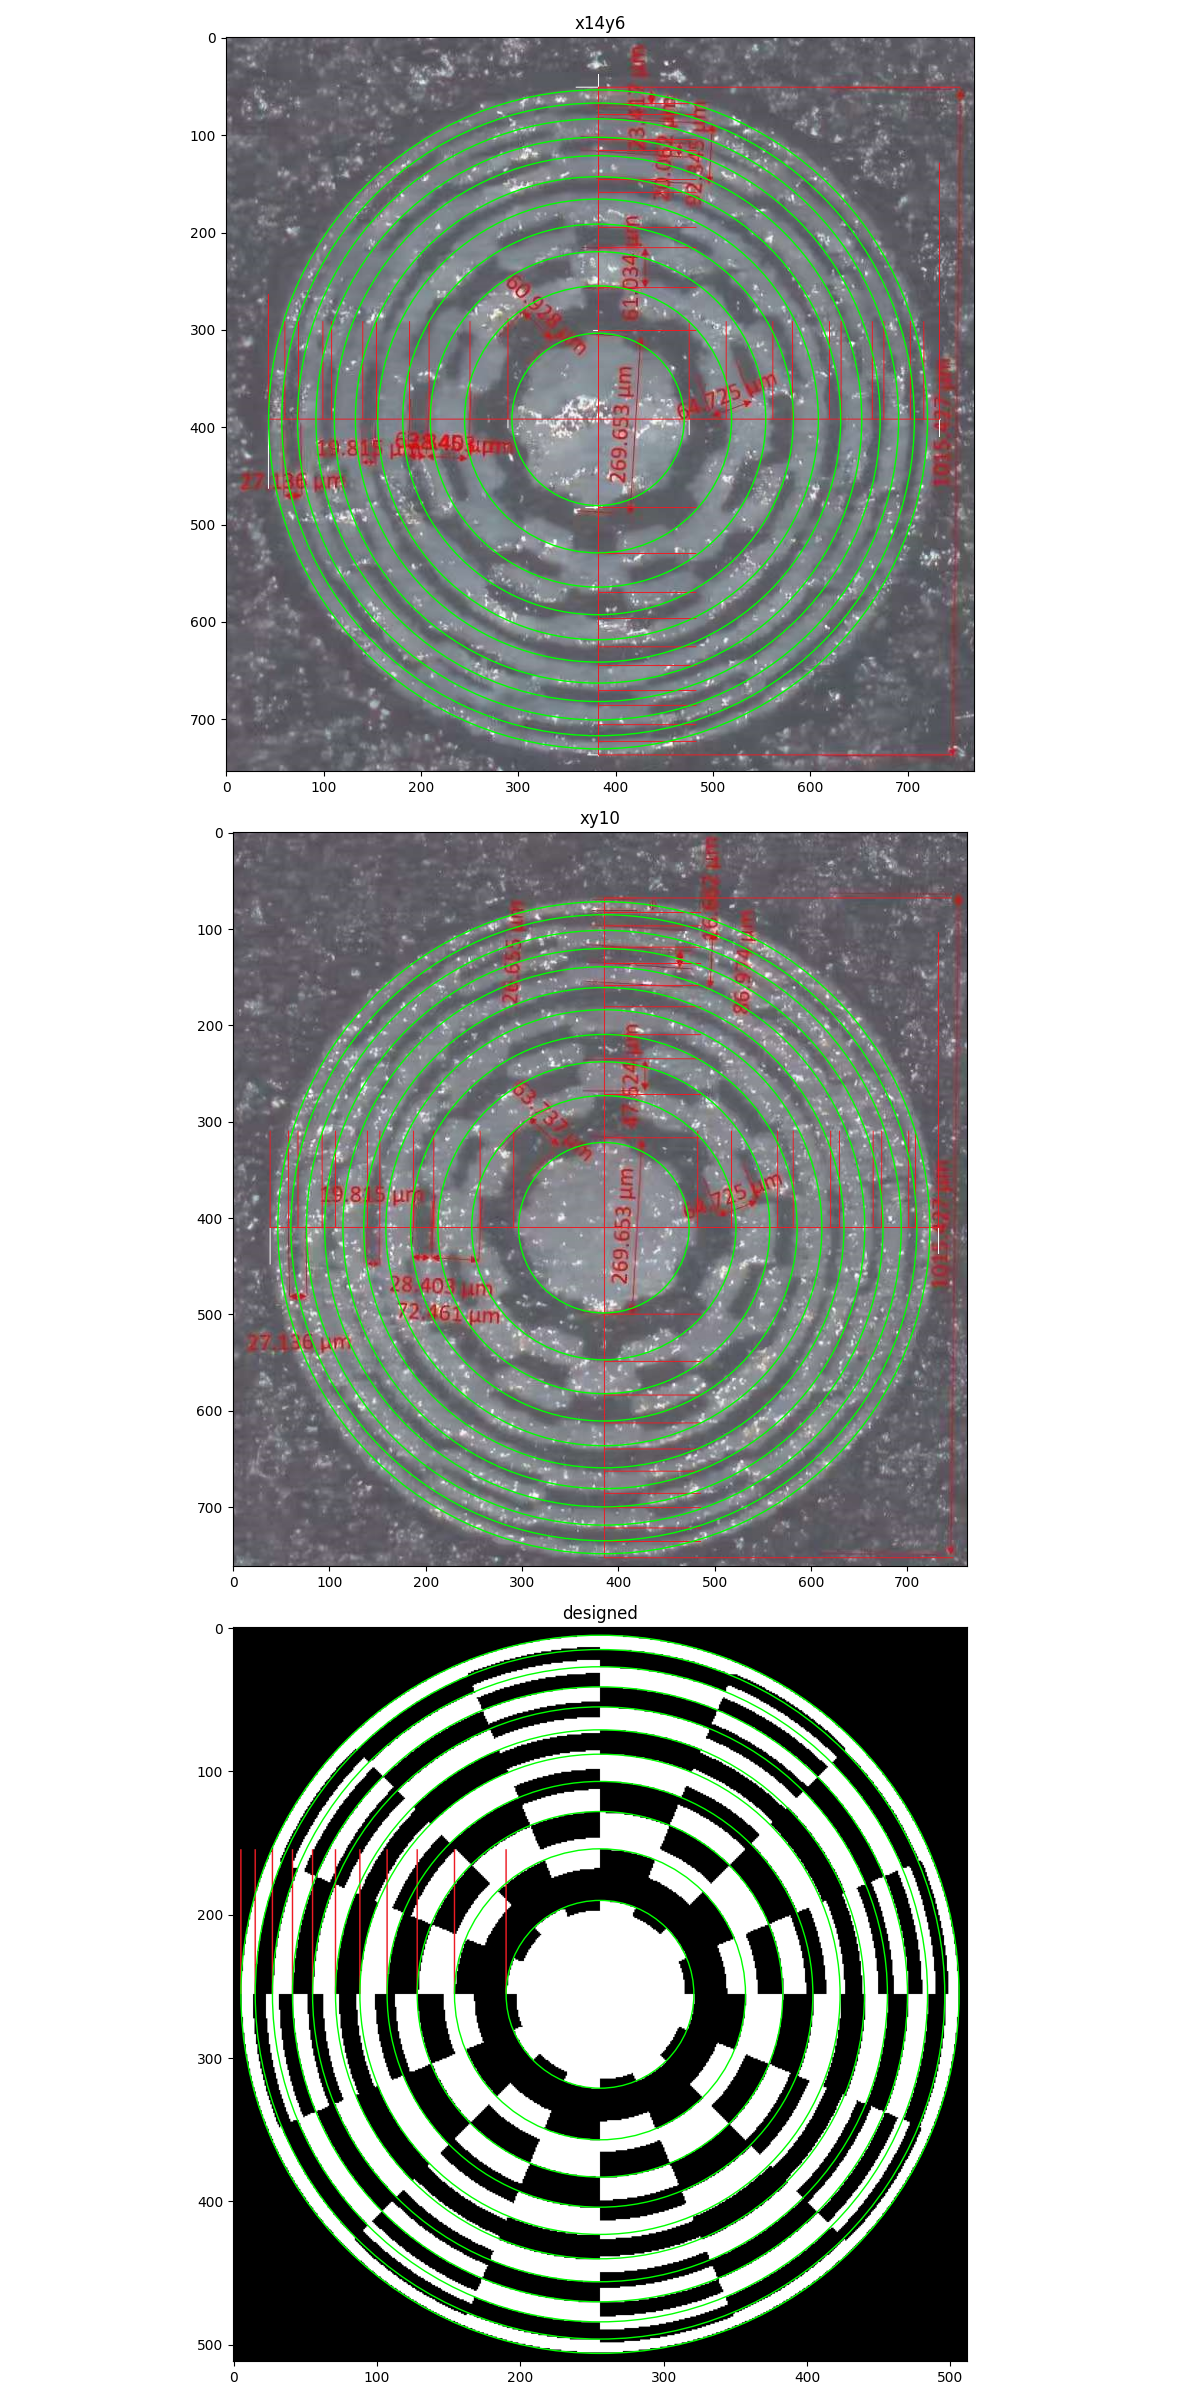

In [3]:
layout = [[0], [1], [2]]
fig, ax = plt.subplot_mosaic(layout, figsize=(12, 24))
ax[0].imshow(np.moveaxis(img_a_array, 0, 1))
ax[1].imshow(np.moveaxis(img_a2_array, 0, 1))
ax[2].imshow(np.moveaxis(img_d_array, 0, 1), cmap='grey')
ax[0].set_title('x14y6')
ax[1].set_title('xy10')
ax[2].set_title('designed')
for r in rd:
    circle = patches.Circle(center_a_coordinate, r/micron_per_pixel, edgecolor='lime', facecolor='none', linewidth=1)
    ax[0].add_patch(circle)
    circle = patches.Circle(center_a2_coordinate, r/micron_per_pixel, edgecolor='lime', facecolor='none', linewidth=1)
    ax[1].add_patch(circle)
    circle = patches.Circle(center_d_coordinate, r/micron_per_design_pixel, edgecolor='lime', facecolor='none', linewidth=1)
    ax[2].add_patch(circle)
fig.tight_layout()
plt.savefig(f'aperture/tmp/compare_all.png', dpi=300)
plt.show()